In [1]:
import numpy as np
# import matplotlib
# matplotlib.use("AGG")
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "100"
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [2]:
# arr = np.load('./data/data_array_all.npy')
# # arr = arr.flatten()*75/(1e6)*1000
# arr = arr
# # print(len(arr))
# # print(arr[0])

# for index in range(len(arr)):
#     if arr[index][0] == 32858:
#         print(index)

No handles with labels found to put in legend.


Chan: 0 V std 16.19
Chan: 1 V std 16.06
Chan: 2 V std 16.17
Chan: 3 V std 16.11
Chan: 4 V std 15.98
Chan: 5 V std 15.99
Chan: 6 V std 15.76
Chan: 7 V std 15.71
Chan: 8 V std 15.46
Chan: 9 V std 15.43
Chan: 10 V std 15.28
Chan: 11 V std 15.20
Chan: 12 V std 14.86
Chan: 13 V std 14.85
Chan: 14 V std 14.81
Chan: 15 V std 14.58
Chan: 16 V std 14.46
Chan: 17 V std 14.32
Chan: 18 V std 14.17
Chan: 19 V std 14.11
Chan: 20 V std 13.83
Chan: 21 V std 13.75
Chan: 22 V std 13.74
Chan: 23 V std 13.58
Chan: 24 V std 13.47
Chan: 25 V std 13.61
Chan: 26 V std 13.54
Chan: 27 V std 13.14
Chan: 28 V std 12.95
Chan: 29 V std 13.11
Chan: 30 V std 12.74
Chan: 31 V std 12.72
Chan: 32 V std 12.34


/hpcfs/juno/junogpu/fuys/SoftWare/anaconda_env/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


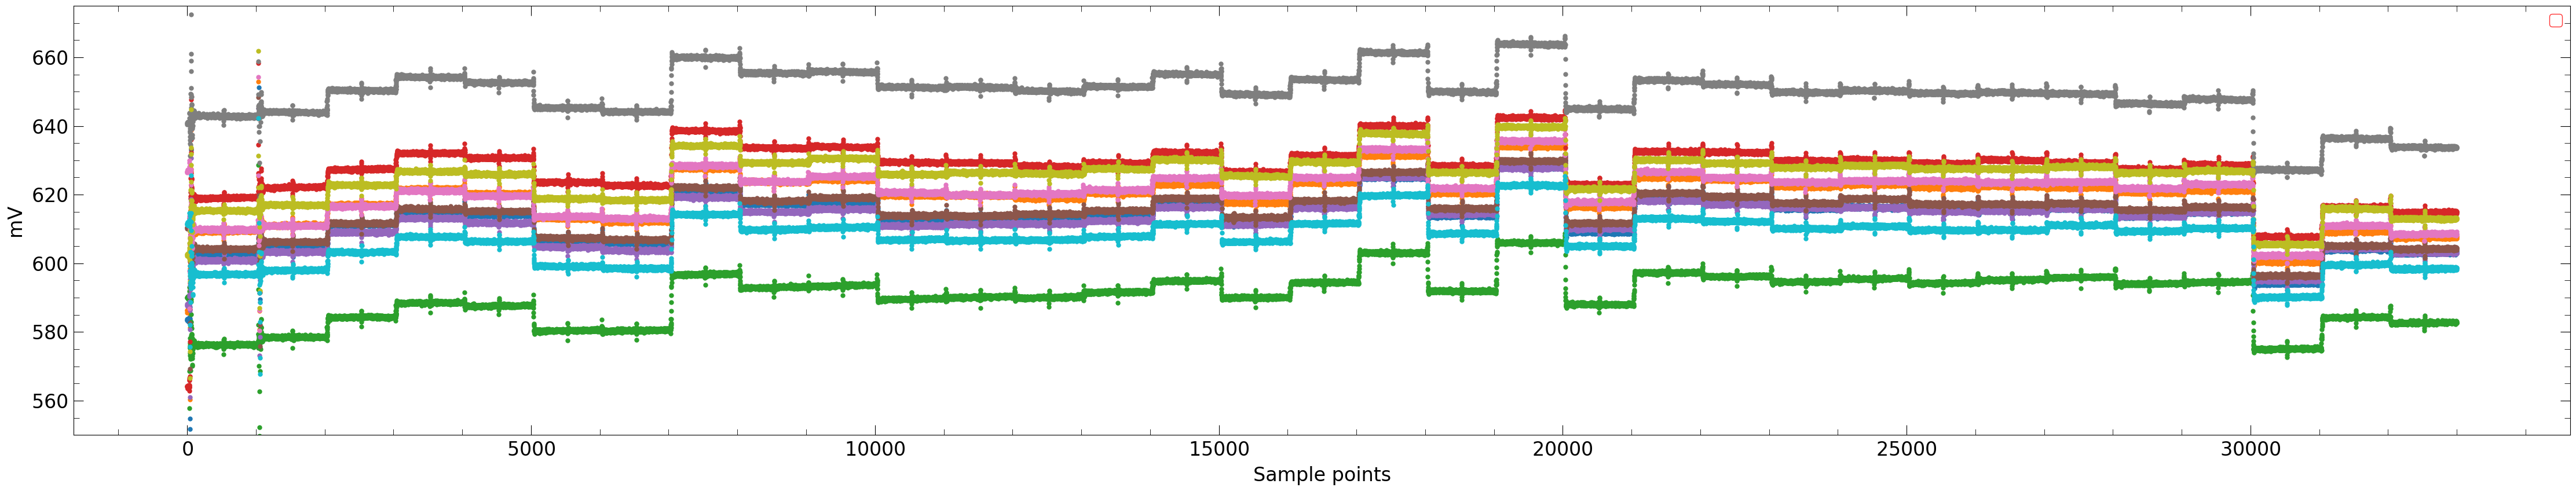

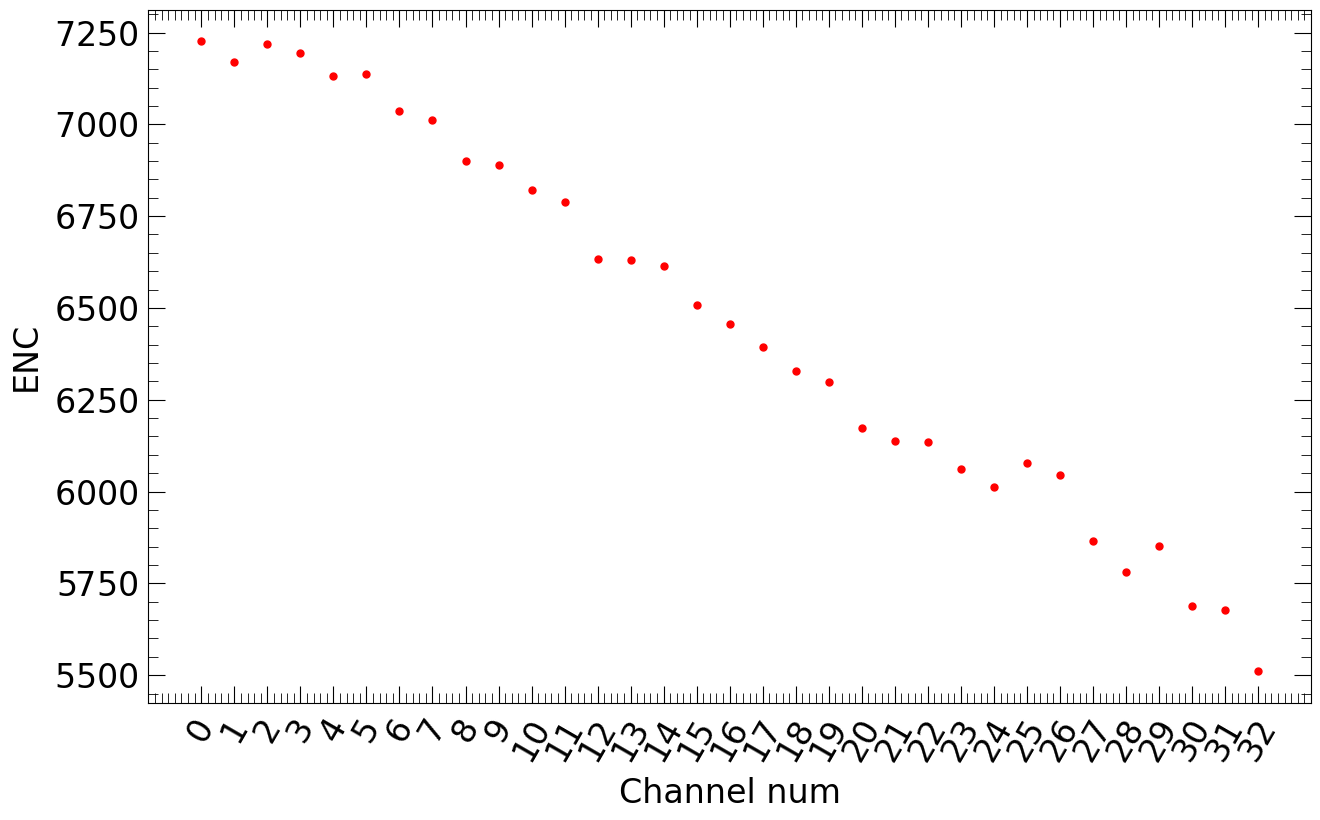

In [11]:
arr = np.load('./data/data_array_all.npy')

chan_dict={}
for chan in range(33):
    chan_dict[str(chan)] = np.array([])

package_len = 6146
all_useful_data = np.array([])
all_useful_shift_data = np.array([])
for index in range(10):
# for index in range(int(len(arr)/package_len)):
    package_data = arr[index*package_len:(index+1)*package_len]
    base_line = package_data[0][4]*75/(1e6)*1000
    select_data = package_data[1:-1].flatten()*75/(1e6)*1000
    cut_data = select_data[200:33200]
    all_useful_data = np.append(all_useful_data, cut_data)

    cut_select_data = select_data[200:33200] #-base_line#np.mean(select_data[300:400])
    all_useful_shift_data = np.append(all_useful_shift_data, cut_select_data)

    for chann in range(33):
        data = cut_select_data[chann*1000:(chann+1)*1000] 
        result = np.append(data[100:400],data[600:900])
        array_index = chann % 33
        chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)



fig, ax = plt.subplots(figsize=(15*3, 9))
dis_chan = 33
for n in range(10):
    ax.plot(all_useful_data[33000*n:dis_chan*1000+33000*n],'.')

# for index in range(9,11):
#     ax.plot(chan_dict[str(index)],label='channel_%s'%index)
    
# ax.hist(chan_dict[str(5)],label='channel_%s'%index)

ax.set_xlabel("Sample points")
ax.set_ylabel("mV")
ax.set_ylim(550,675)
ax.legend(frameon=True, edgecolor='red',fontsize=20)
plt.tight_layout()
plt.savefig("test.pdf")

chan_index=[]
ENC_value=[]
for index, value in chan_dict.items():
    # print("std",np.std(value))
    chan_index.append(index)
    ENC_value.append(np.std(value)/14*6250)
    print("Chan: %s V std %0.2f"%(index,np.std(value)))
    # print("ENC",np.std(value)/14*6250)

fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(chan_index, ENC_value,'.r')
ax.set_xlabel("Channel num")
ax.set_ylabel("ENC")
ax.set_xticklabels(labels=chan_index,rotation=60)
plt.savefig("./ENC.pdf")

In [4]:
print(2/14*6250,"ENC")

892.8571428571428 ENC
